In [26]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [27]:
using JLD2, CairoMakie, GLMakie

In [28]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Сопоставление с матконт/файлы matlab")

I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:];

In [29]:
Λs = load("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Map LSE/point 2 Kazakov/LSs_400_400_map_Kazakov.jld")["Λs"]
u0s = load("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Map LSE/point 2 Kazakov/u0s_400_400_map_Kazakov.jld")["u0s"]

U0range = range(0.267, 0.260, length = 400)
I0range = range( -1.7, -1.73,  length = 400)

-1.7:-7.518796992481203e-5:-1.73

In [30]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/Сопоставление с матконт/файлы matlab")

I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

index_start_hom_bt = 1; index_end_hom_bt = 8000


cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Levanova/3 набор параметров/bifurcationkit")

hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

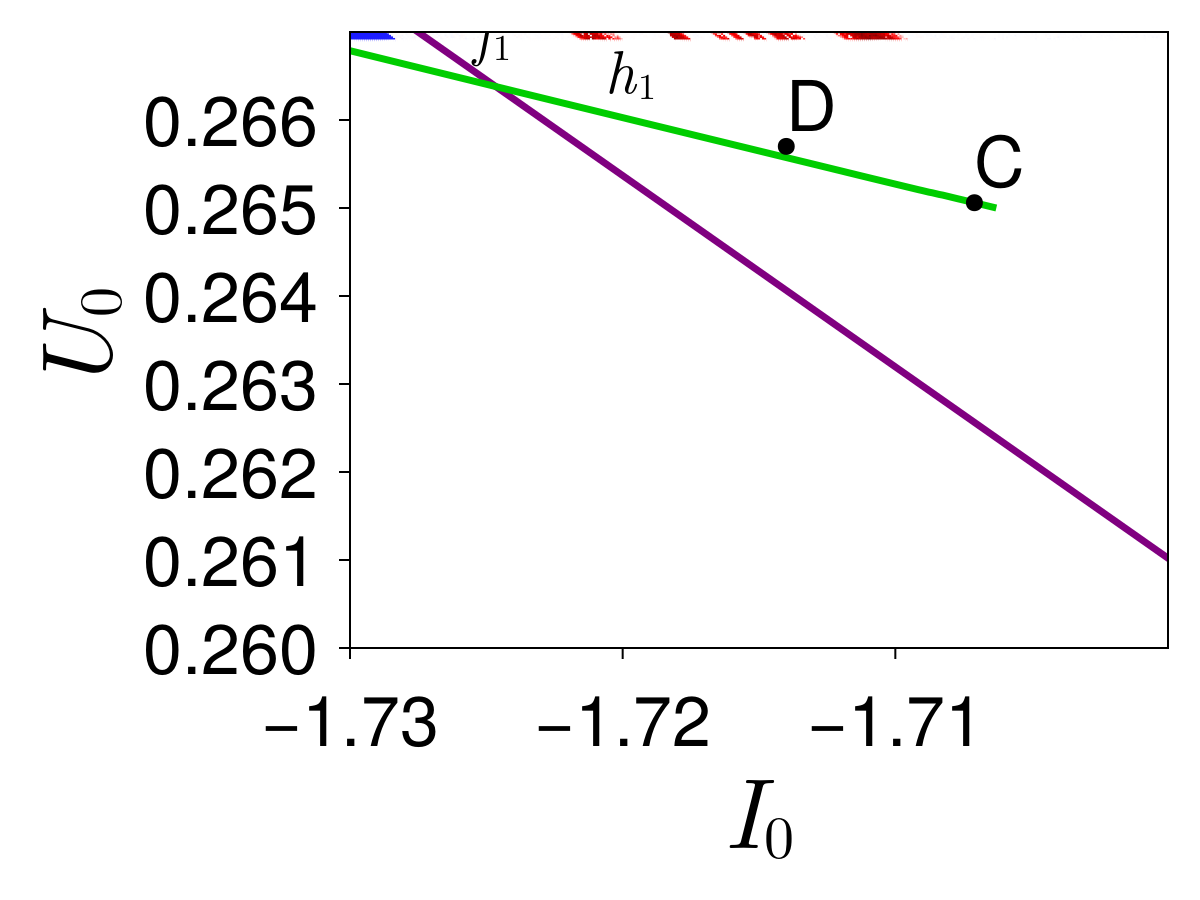

In [31]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax
CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 25
textsizecurve = 30
lw = 3.5
mksize = 12

ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)#, xticks = [-1.729, -1.717, -1.705])

hm = heatmap!(ax, I0range, U0range, Λs[:, :, index], colormap = :seismic,
                 colorrange = (mn, mx))

#lines!(ax, hp_codim2_1I0, hp_codim2_1U0, label = "Hopf", color = :magenta)
lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", color = :purple, linewidth = lw)
text!(ax, -1.7255, 0.2666, text = L"f_1", fontsize = textsizecurve)

colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
text!(ax, I0_hom[100], u0_hom[100], text = L"h_1", fontsize = textsizecurve, align = (:right, :bottom), offset = (0, 10))

#lines!(ax, I0_hom_bt[index_start_hom_bt:index_end_hom_bt], U0_hom_bt[index_start_hom_bt:index_end_hom_bt], label = "Hom from BT", color = :orange)
                 
#scatter!(ax, -1.1182463005483, 0.161724273501619, label = "cusp", markersize = 8, color = :black)
#scatter!(ax, -1.30295711421099, 0.179884505801528, label = "BT", markersize = 8, color = :red)
#scatter!(ax, -1.71286533418216, 0.221636390745317, label = "GH", markersize = 8, color = :blue)
#scatter!(ax, -1.3311265433046, 0.182481512082655, label = "ZH", markersize = 8, color = :purple)

# На другой карте!!!!
scatter!(ax, −1.723, 0.282, markersize = 12, color = :black)
text!(ax,  −1.723, 0.282, text = "A", fontsize = ticksize, align =(:right, :bottom))
scatter!(ax, -1.728, 0.282, markersize = 12, color = :black)
text!(ax, -1.728, 0.282, text = "B", fontsize = ticksize)

scatter!(ax, -1.7071, 0.26506, markersize = 12, color = :black)
text!(ax, -1.7071, 0.26506, text = "C", fontsize = ticksize)

scatter!(ax, -1.714, 0.2657, markersize = 12, color = :black)
text!(ax, -1.714, 0.2657, text = "D", fontsize = ticksize)

xlims!(-1.73, -1.7)
ylims!(0.260, 0.267)

#=scatter!(ax, -1.708897346147939, 0.2651896499135336, markersize = 12, color = :black)
text!(ax, -1.708897346147939, 0.2651896499135336, text = L"K", fontsize = 40)

scatter!(ax, -1.7262074829061693, 0.26649825810897465, markersize = 12, color = :black)
text!(ax, -1.7262074829061693, 0.26649825810897465, text = L"G", fontsize = 40, align = (:left, :top), offset = (-9.0, -9.0))
=#
#axislegend(ax, position = :rt, labelsize = 35)
display(f);